<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

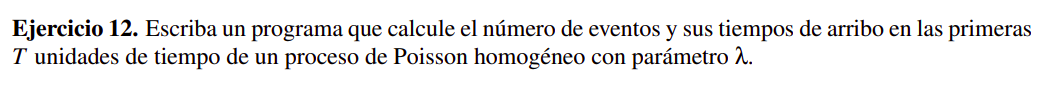

In [85]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NUMERO_DE_MUESTRAS = 100_000
X_MIN, X_MAX = -20, 20
DOMINIO = np.linspace(X_MIN, X_MAX, 1000)

TASA_LAMBDA = 4
TIEMPO_TOTAL = 30

In [86]:
def generar_tiempo_exponencial(tasa_lambda=TASA_LAMBDA):
    return -np.log(1 - random()) / tasa_lambda

def generar_eventos_poisson(tasa_lambda=TASA_LAMBDA, tiempo_total=TIEMPO_TOTAL):
    tiempos_eventos = []
    tiempo_actual = generar_tiempo_exponencial(tasa_lambda)

    while tiempo_actual <= tiempo_total:
        tiempos_eventos.append(tiempo_actual)
        tiempo_actual += generar_tiempo_exponencial(tasa_lambda)

    return tiempos_eventos

In [87]:
# Generar datos
eventos = generar_eventos_poisson()
intervalos = [t2 - t1 for t1, t2 in zip([0] + eventos[:-1], eventos)]


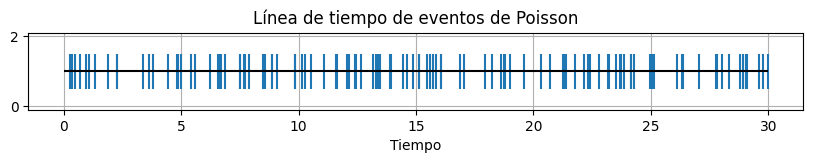

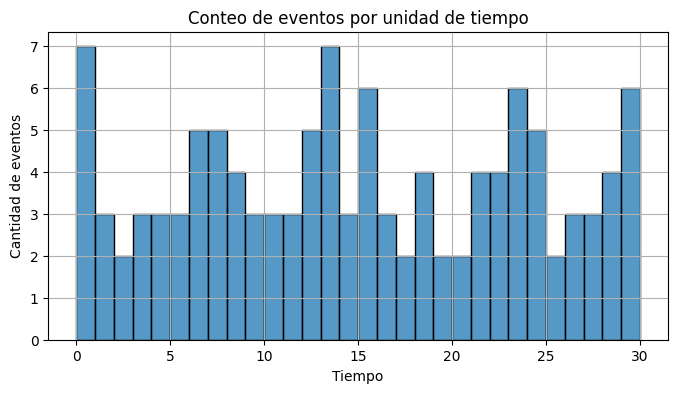

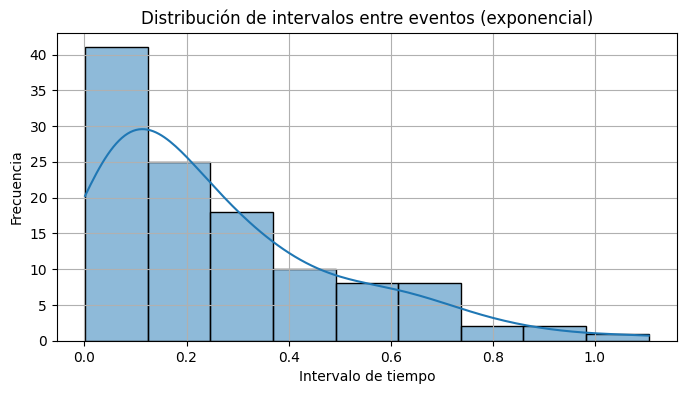

In [88]:
#@title { vertical-output: true}

# 1. Línea de tiempo de eventos
plt.figure(figsize=(10, 1))
plt.eventplot(eventos)
plt.hlines(1, 0, TIEMPO_TOTAL, color='black')
plt.title("Línea de tiempo de eventos de Poisson")
plt.xlabel("Tiempo")
plt.grid(True)

# 2. Histograma de cantidad de eventos por unidad de tiempo
plt.figure(figsize=(8, 4))
sns.histplot(eventos, bins=list(range(0, TIEMPO_TOTAL + 1)), edgecolor='black')
plt.title("Conteo de eventos por unidad de tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Cantidad de eventos")
plt.grid(True)

# 3. Histograma de tiempos entre eventos
plt.figure(figsize=(8, 4))
sns.histplot(intervalos, kde=True, edgecolor='black')
plt.title("Distribución de intervalos entre eventos (exponencial)")
plt.xlabel("Intervalo de tiempo")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.show()